In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import numpy as np
import matplotlib.pyplot as plt

data = fetch_california_housing(as_frame = True)
X = data.data
y = data.target.values


scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

#this is stochastic gradient descent for linear regression
stoc_Grad_reg = SGDRegressor(max_iter=10000)
stoc_Grad_reg.fit(X_norm, y)

w_norm = stoc_Grad_reg.coef_
b_norm = stoc_Grad_reg.intercept_


#lets predict y based on x_norm
y_pred = stoc_Grad_reg.predict(X_norm)
print(y_pred.shape, y.shape)

# print(f"first four of x_norm -> {X_norm[:4]} and y_pred {y_pred[:4]}")

# print(f"w norm --> {w_norm} and b norm --> {b_norm}")

features = data.feature_names
print(features)







(20640,) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


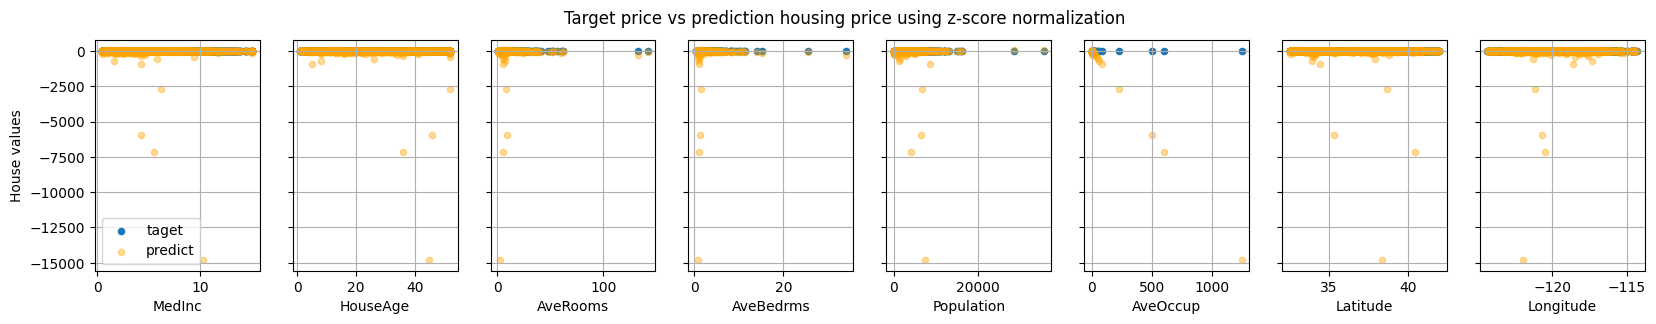

In [47]:
#now lets plot the prediction and target for the given feature

fig, ax = plt.subplots(1, 8, figsize=(20,3), sharey=True)
for i in range(8):
  ax[i].scatter(X.iloc[: , i], y, s=20,  label = "taget")
  ax[i].set_xlabel(features[i])
  ax[i].scatter(X.iloc[: , i], y_pred, s=20, color="orange",alpha =0.4, label ="predict")
  ax[i].grid(True)
ax[0].set_ylabel("House values")
ax[0].legend()
fig.suptitle("Target price vs prediction housing price using z-score normalization")
plt.show()
